# Exploratory Data Analysis

**Imports**

In [1]:
import pandas as pd
from eda import get_text_len, plot_word_cloud
from helper import load_dataset
import matplotlib.pyplot as plt

In [2]:
train_dataset = load_dataset('../dataset/training.json', test=True)
val_dataset = load_dataset('../dataset/validation_data.json', test=False)
train_dataset['word_count'] = train_dataset.apply(get_text_len, axis=1)
val_dataset['word_count'] = val_dataset.apply(get_text_len, axis=1)

**Dataframe Head**

In [3]:
train_dataset.head()

,text,label,word_count
id,,,
0,Have you ever heard of the Crusades? A time in...,1,38
1,"The professors, who likely have nearly a decad...",1,31
2,Kemba Walker does a good job of defending Foye...,1,22
3,"Ganias' lawyer, Stanley Twardy, urged the gove...",1,13
4,The Circuit Court of Appeals of New Jersey had...,0,50


In [4]:
val_dataset.head()

,text,word_count
id,,
0,"So, how to explain this flowering of violin co...",12
1,"""The bill will not authorize a public utility ...",47
2,"[2] Act of April 6, 1940, c. 461, § 15, 60 S...",27
3,You're Nobody Til Somebody Loves You - Dean Ma...,10
4,"""Believe me, when a Pole or Hungarian comes to...",43


**Sample AI text**

In [5]:
train_dataset.iloc[0].text

'Have you ever heard of the Crusades? A time in which Christians went on a 200 year rampage throughout Europe and on their path to Isreal in which they slaughtered innocent people in the name of your God?'

**Sample Human text**

In [6]:
train_dataset.iloc[4].text

'The Circuit Court of Appeals of New Jersey had jurisdiction of the controversy between these parties, and its decree was affirmed. But as the court had jurisdiction under the original act of Congress, the jurisdiction in this case was also, under the act of Congress, a bar to the suit.'

**Dataset label distribution**

In [7]:
print('AI text')
print(train_dataset[train_dataset['label'] == 0].count())

print('\nHuman text')
print(train_dataset[train_dataset['label'] == 1].count())

AI text
text          9000
label         9000
word_count    9000
dtype: int64

Human text
text          9000
label         9000
word_count    9000
dtype: int64


## Word count - Train dataset

In [8]:
train_dataset['word_count'].describe()

count    18000.000000
mean        34.771833
std         27.176340
min          1.000000
25%         17.000000
50%         26.000000
75%         42.000000
max        193.000000
Name: word_count, dtype: float64

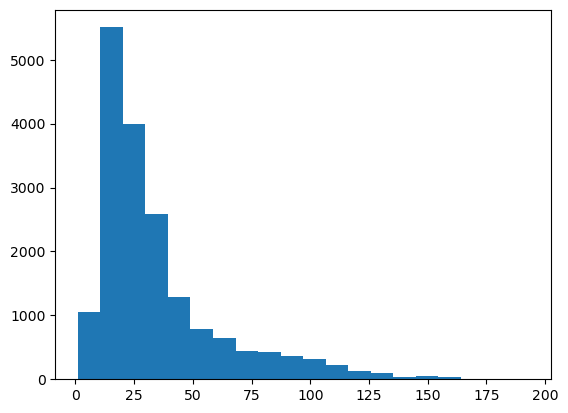

In [9]:
plt.hist(train_dataset['word_count'], bins = 20)
plt.show()

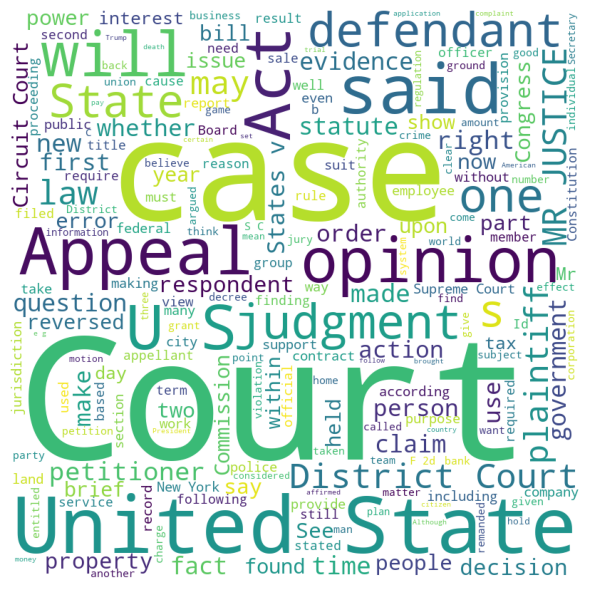

In [10]:
plot_word_cloud(train_dataset)

## Word count - Validation dataset

In [11]:
val_dataset['word_count'].describe()

count    2000.000000
mean       34.410500
std        26.701282
min         1.000000
25%        16.000000
50%        26.000000
75%        42.000000
max       182.000000
Name: word_count, dtype: float64

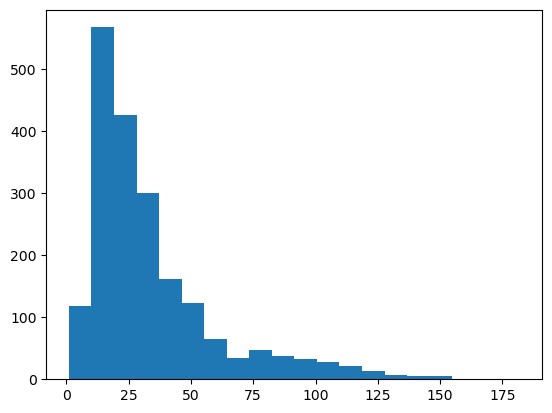

In [12]:
plt.hist(val_dataset['word_count'], bins = 20)
plt.show()

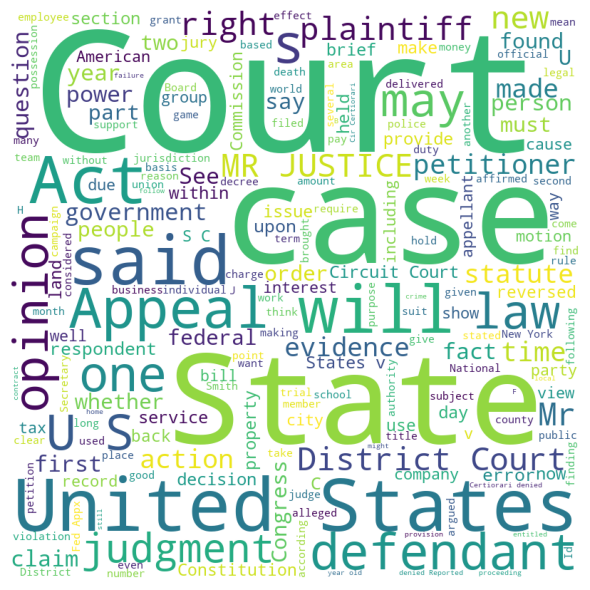

In [13]:
plot_word_cloud(val_dataset)